In [18]:
import pandas as pd 
import seaborn as sns
logs = pd.read_csv('logs.csv')
user_data = pd.read_csv('user_data.csv')

In [4]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [3]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [4]:
logs.platform.nunique()

3

Какой клиент совершил больше всего успешных операций?

In [12]:
#users_purchases = user_df.groupby('user_id', as_index=False) \
#    .agg({'brand_name': 'count'}) \
#    .rename(columns={'brand_name': 'purchases'}) \
#    .query('purchases >= 5')
users_purchases = logs.query('success == True') \
    .groupby('client', as_index=False)\
    .agg({'success' : 'count'})\
    .rename(columns={'success':'purchases'})
users_purchases = users_purchases.sort_values('purchases', ascending=False)

In [13]:
users_purchases.head()

,client,purchases
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41


In [15]:
max_count = max(users_purchases.purchases)
max_count

41

In [37]:
#rslt_df = dataframe[dataframe['Percentage'] > 80]
#df.loc[df['column_name'] == some_value]
top_users = users_purchases[users_purchases['purchases'] == 41]
top_users_list = top_users.client.tolist()
top_users_list.sort()
top_users_list


[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [35]:
top_users

,client,purchases
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41


С какой платформы было совершено наибольшее количество успешных операций?

In [9]:
users_purchases_platform = logs.query('success == True') 
users_purchases_platform.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
5,41928,True,phone,1585446772


In [6]:
platform_unique = set(logs['platform'])

In [7]:
platform_unique

{'computer', 'phone', 'tablet'}

In [12]:
[users_purchases_platform.loc[users_purchases_platform.platform == platform].count() for platform in platform_unique]
#Число успешных операций для каждой из платформ выше

[client      180
 success     180
 platform    180
 time        180
 dtype: int64,
 client      2019
 success     2019
 platform    2019
 time        2019
 dtype: int64,
 client      1090
 success     1090
 platform    1090
 time        1090
 dtype: int64]

In [13]:
logs.loc[logs['success'] == True].platform.value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

Какая платформа наиболее популярна среди премиумных клиентов?

In [15]:
premium_users = user_data.loc[user_data['premium'] == True]
premium_users

,client,premium,age
22,74867,True,27
23,49379,True,25
24,88203,True,35
29,32603,True,20
51,53182,True,24
...,...,...,...
2928,52373,True,36
2930,13688,True,66
2934,40643,True,22
2947,53774,True,50


In [16]:
premium_df = users_purchases_platform.merge(premium_users, on='client')
premium_df

,client,success,platform,time,premium,age
0,11983,True,phone,1585459511,True,68
1,99308,True,computer,1585409409,True,38
2,53978,True,computer,1585408637,True,46
3,85502,True,computer,1585405950,True,58
4,4318,True,phone,1585442895,True,45
...,...,...,...,...,...,...
298,20278,True,computer,1585456706,True,65
299,78455,True,phone,1585459854,True,23
300,57026,True,computer,1585438120,True,62
301,2864,True,phone,1585459818,True,41


In [17]:
premium_df.platform.value_counts()

phone       177
computer    108
tablet       18
Name: platform, dtype: int64

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), 
используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

In [19]:
df = logs.merge(user_data, on='client')
df

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [27]:
ages_count = df.groupby('age').age.value_counts().tolist()

In [29]:
ages_count_premium = df.loc[df['premium'] == True].groupby('age').age.value_counts().tolist()
ages_count_premium

[9,
 8,
 7,
 7,
 5,
 17,
 9,
 11,
 6,
 11,
 5,
 6,
 6,
 7,
 9,
 14,
 11,
 10,
 10,
 5,
 8,
 9,
 6,
 9,
 7,
 5,
 6,
 8,
 3,
 11,
 9,
 9,
 11,
 9,
 11,
 4,
 5,
 15,
 7,
 12,
 7,
 11,
 6,
 2,
 13,
 10,
 7,
 11,
 9,
 7]

In [32]:
import numpy as np

ages_count_premium = np.array(ages_count_premium)
ages_count = np.array(ages_count)
premium_ratio = ages_count_premium / ages_count
premium_ratio

array([0.16363636, 0.13793103, 0.12068966, 0.14      , 0.05494505,
       0.14049587, 0.140625  , 0.14473684, 0.04379562, 0.171875  ,
       0.09433962, 0.1       , 0.06382979, 0.10144928, 0.17307692,
       0.20588235, 0.15714286, 0.15384615, 0.14925373, 0.08474576,
       0.14545455, 0.15      , 0.0952381 , 0.125     , 0.09859155,
       0.08333333, 0.08571429, 0.11594203, 0.04918033, 0.10280374,
       0.14516129, 0.16363636, 0.10377358, 0.2       , 0.16666667,
       0.07692308, 0.09090909, 0.29411765, 0.10144928, 0.19672131,
       0.1372549 , 0.15714286, 0.10169492, 0.04761905, 0.25      ,
       0.0952381 , 0.125     , 0.16666667, 0.08411215, 0.07777778])

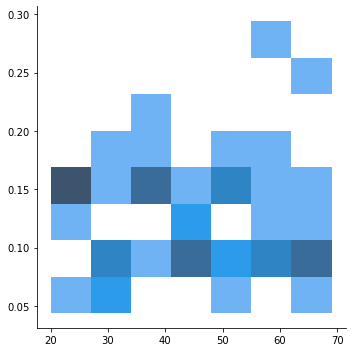

In [46]:
ax = sns.displot(x=list(set(df.age)), y=list(premium_ratio))


In [40]:
np.array(set(df.age))

array({20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69},
      dtype=object)

In [20]:
set(df.age)

{20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69}